In [1]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import cos, asin, sqrt, pi
import sys

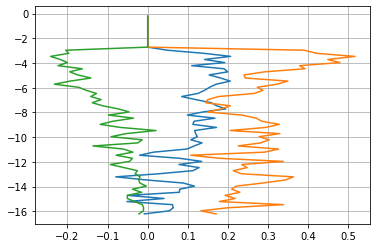

In [2]:
hf = h5py.File('ADCP_19_01_22_04.mat', 'r')
east_vel = hf['East_vel']
north_vel = hf['North_vel']
vertical_vel = hf['Vertical_vel']
z = hf['z_vec']

fig, ax = plt.subplots()
ax.plot(east_vel[1,:], z, label='East velocity [m/sec]')
ax.plot(north_vel[1,:], z, label='North velocity [m/sec]')
ax.plot(vertical_vel[1,:], z, label='Vertical velocity [m/sec]')
#plt.legend()

plt.grid(True)
plt.show()

In [3]:
east_vel[0,:].shape

(65,)

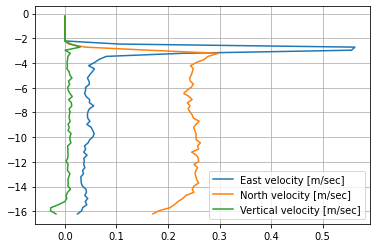

In [4]:
hf = h5py.File('ADCP_19_01_22_04.mat', 'r')
east_vel = np.array(hf['East_vel'])
north_vel = np.array(hf['North_vel'])
vertical_vel = np.array(hf['Vertical_vel'])
z = np.array(hf['z_vec'])
t = hf['time_vec']
hf.close()

time_start = 0*60 # sec
time_stop = 5*60 # sec
time_step = 2.5 #sec
start_i = int(time_start/time_step)
stop_i = int(time_stop/time_step)

east_vel_mean = np.mean(east_vel[start_i:stop_i], axis=0)
north_vel_mean = np.mean(north_vel[start_i:stop_i], axis=0)
vertical_vel_mean = np.mean(vertical_vel[start_i:stop_i], axis=0)

fig, ax = plt.subplots()
ax.plot(east_vel_mean, z, label='East velocity [m/sec]')
ax.plot(north_vel_mean, z, label='North velocity [m/sec]')
ax.plot(vertical_vel_mean, z, label='Vertical velocity [m/sec]')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
time_start

0

In [6]:
def distance(lat1, lon1, lat2, lon2):
    r = 6371 # km
    p = pi / 180

    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 2 * r * asin(sqrt(a))

In [7]:
radar_lat = 32.07833
radar_long = 34.47233

In [8]:
adcp_lat = 32.08048
adcp_long = 34.46277

In [9]:
distance(radar_lat, radar_long, adcp_lat, adcp_long)

0.9319006597343568

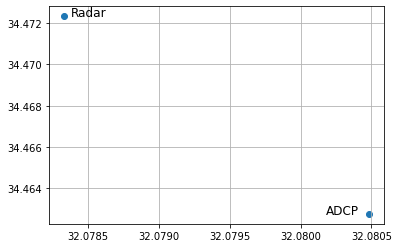

In [10]:
# Create scatter plot
plt.scatter(x=np.array([radar_lat, adcp_lat]), y=np.array([radar_long, adcp_long]))

# Label each point with an offset
plt.text(radar_lat +0.0003 , radar_long , 'Radar', fontsize=12, ha='right')
plt.text(adcp_lat - 0.00007, adcp_long , 'ADCP', fontsize=12, ha='right')

# Set grid
plt.grid(True)

# Show the plot
plt.show()

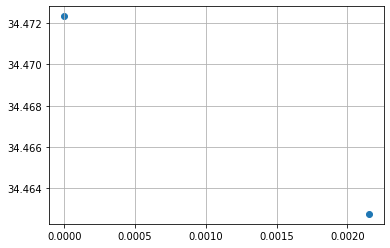

In [11]:
# Create scatter plot
plt.scatter(x=np.array([radar_lat - radar_lat, adcp_lat-radar_lat]), y=np.array([radar_long, adcp_long]))

# Label each point with an offset
#plt.text(radar_lat +0.0003 , radar_long , 'Radar', fontsize=12, ha='right')
#plt.text(adcp_lat - 0.00007, adcp_long , 'ADCP', fontsize=12, ha='right')

# Set grid
plt.grid(True)

# Show the plot
plt.show()

In [12]:
# Put the radar point on (0,0)

In [13]:
radar_0_lat = radar_lat - radar_lat
adcp_0_lat = adcp_lat - radar_lat

In [14]:
radar_0_long = radar_long - radar_long 
adcp_0_long = adcp_long - radar_long

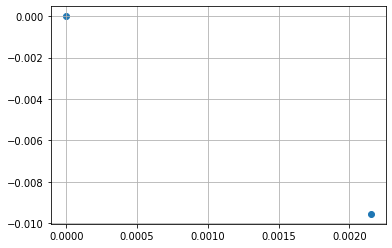

In [15]:
# Create scatter plot
plt.scatter(x=np.array([radar_0_lat, adcp_0_lat]), y=np.array([radar_0_long, adcp_0_long]))

# Label each point with an offset
#plt.text(radar_lat +0.0003 , radar_long , 'Radar', fontsize=12, ha='right')
#plt.text(adcp_lat - 0.00007, adcp_long , 'ADCP', fontsize=12, ha='right')

# Set grid
plt.grid(True)

# Show the plot
plt.show()

In [16]:
# Convert to km 

In [17]:
x = np.array([radar_lat, adcp_lat])
y = np.array([radar_long, adcp_long])
x_dist = x[1]-x[0]
y_dist = y[0]-y[1]

In [18]:
theta = np.arctan2(y_dist,x_dist)

In [19]:
km_distance = distance(radar_lat, radar_long, adcp_lat, adcp_long)

In [20]:
opp = km_distance*np.sin(theta)
opp

0.9091917380933765

In [21]:
adj = km_distance*np.cos(theta)
adj

0.20447303733273597

In [22]:
km_distance

0.9319006597343568

In [23]:
adcp_lat_m = adj * 1000
adcp_long_m = opp * 1000

In [24]:
sys.path.append("C:\\Users\josep\Desktop\PHYC40900_Project TP")
f = h5py.File('C:\\Users\josep\Desktop\PHYC40900_Project TP\Real Data Sets\First Tel-Aviv data', 'r')
x = f.get('x')
y = f.get('y')
t = f.get('t')
wamos = f.get('wamos')

x = np.array(x)
y = np.array(y)
t = np.array(t)
wamos = np.array(wamos)

In [25]:
def mean(x):
    return np.sum(x)/len(x)

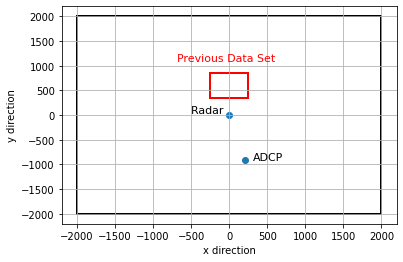

In [26]:
# Create scatter plot
plt.scatter(x=np.array([radar_0_lat, adcp_lat_m]), y=np.array([radar_0_long, -adcp_long_m]))

# Label each point with an offset
plt.text(radar_lat -55 , radar_long , 'Radar ', fontsize=11, ha='right')
plt.text(adcp_lat_m + 500, -adcp_long_m , 'ADCP', fontsize=11, ha='right')

plt.grid(True)

square_side = 4000
square_center = (0, 0)
square = patches.Rectangle((square_center[0] - square_side / 2, square_center[1] - square_side / 2), 
                           square_side, square_side, linewidth=1, edgecolor='black',  facecolor='none', lw = "2")
plt.gca().add_patch(square)

square_side = np.max(x) - x[0]
square_center = (mean(x), mean(y))
square = patches.Rectangle((square_center[0] - square_side / 2, square_center[1] - square_side / 2), 
                           square_side, square_side, linewidth=1, edgecolor='red',  facecolor='none', lw = "2")
plt.gca().add_patch(square)

plt.text(600 , 1100 , 'Previous Data Set', fontsize=11, ha='right', color ='red')


plt.xlabel("x direction")
plt.ylabel("y direction")
# Show the plot
plt.show()

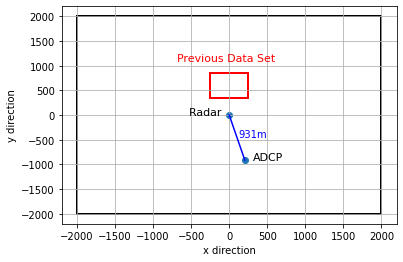

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Assuming you have radar_0_lat, radar_0_long, adcp_lat_m, adcp_long_m defined

# Create scatter plot
plt.scatter(x=np.array([radar_0_lat, adcp_lat_m]), y=np.array([radar_0_long, -adcp_long_m]))

# Label each point with an offset
plt.text(radar_0_lat - 55, radar_0_long, 'Radar ', fontsize=11, ha='right')
plt.text(adcp_lat_m + 500, -adcp_long_m, 'ADCP', fontsize=11, ha='right')

# Add a line between radar and ADCP
plt.plot([radar_0_lat, adcp_lat_m], [radar_0_long, -adcp_long_m], color='blue')

# Add label for the line
plt.text((radar_0_lat + adcp_lat_m) / 2+20, (radar_0_long - adcp_long_m) / 2, '931m', fontsize=10, color='blue')

plt.grid(True)

square_side = 4000
square_center = (0, 0)
square = patches.Rectangle((square_center[0] - square_side / 2, square_center[1] - square_side / 2), 
                           square_side, square_side, linewidth=1, edgecolor='black',  facecolor='none', lw="2")
plt.gca().add_patch(square)

# Assuming x and y are defined
square_side = np.max(x) - x[0]
square_center = (np.mean(x), np.mean(y))
square = patches.Rectangle((square_center[0] - square_side / 2, square_center[1] - square_side / 2), 
                           square_side, square_side, linewidth=1, edgecolor='red',  facecolor='none', lw="2")
plt.gca().add_patch(square)

plt.text(600, 1100, 'Previous Data Set', fontsize=11, ha='right', color='red')

plt.xlabel("x direction")
plt.ylabel("y direction")

# Show the plot
plt.show()


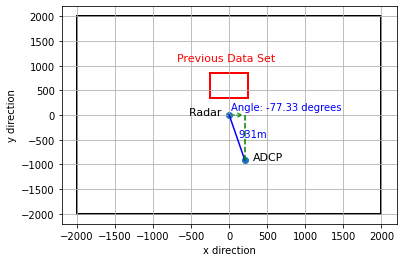

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Assuming you have radar_0_lat, radar_0_long, adcp_lat_m, adcp_long_m defined

# Create scatter plot
plt.scatter(x=np.array([radar_0_lat, adcp_lat_m]), y=np.array([radar_0_long, -adcp_long_m]))

# Label each point with an offset
plt.text(radar_0_lat - 55, radar_0_long, 'Radar ', fontsize=11, ha='right')
plt.text(adcp_lat_m + 500, -adcp_long_m, 'ADCP', fontsize=11, ha='right')

# Add a line between radar and ADCP
plt.plot([radar_0_lat, adcp_lat_m], [radar_0_long, -adcp_long_m], color='blue')

# Add label for the line
plt.text((radar_0_lat + adcp_lat_m) / 2 + 20, (radar_0_long - adcp_long_m) / 2, '931m', fontsize=10, color='blue')

# Calculate the angle in degrees
angle_rad = np.arctan2(-adcp_long_m - radar_0_long, adcp_lat_m - radar_0_lat)
angle_deg = np.degrees(angle_rad)

# Display the angle
plt.text(radar_0_lat + 20, radar_0_long + 100, f'Angle: {angle_deg:.2f} degrees', fontsize=10, color='blue')

# Add a vertical line from ADCP up to the line through the radar point
plt.plot([adcp_lat_m, adcp_lat_m], [0, -adcp_long_m], linestyle='--', color='green')

# Add an angle symbol
plt.annotate("", xy=(adcp_lat_m, 0), xytext=(radar_0_lat, radar_0_long),
             arrowprops=dict(arrowstyle="->", linestyle='--', color='green'))

plt.grid(True)

square_side = 4000
square_center = (0, 0)
square = patches.Rectangle((square_center[0] - square_side / 2, square_center[1] - square_side / 2), 
                           square_side, square_side, linewidth=1, edgecolor='black',  facecolor='none', lw="2")
plt.gca().add_patch(square)

# Assuming x and y are defined
square_side = np.max(x) - x[0]
square_center = (np.mean(x), np.mean(y))
square = patches.Rectangle((square_center[0] - square_side / 2, square_center[1] - square_side / 2), 
                           square_side, square_side, linewidth=1, edgecolor='red',  facecolor='none', lw="2")
plt.gca().add_patch(square)

plt.text(600, 1100, 'Previous Data Set', fontsize=11, ha='right', color='red')

plt.xlabel("x direction")
plt.ylabel("y direction")

# Show the plot
plt.show()
